# Data Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Science/Time Series Forecasting Product/Practice

/content/drive/MyDrive/Colab Notebooks/Data Science/Time Series Forecasting Product/Practice


In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv', index_col = 0, parse_dates = True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [5]:
df = df.rename(columns = {'Demand': 'Revenue'})
df.head(0)

,Revenue,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


In [8]:
#Summary statistics
df.describe()

,Revenue,Easter,Thanksgiving,Christmas,Temperature,Marketing
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,756.059227,0.002737,0.002737,0.002737,15.012655,126.675890
std,152.143070,0.052259,0.052259,0.052259,8.772751,58.274047
min,425.775320,0.000000,0.000000,0.000000,-8.850000,24.589000
25%,641.161123,0.000000,0.000000,0.000000,7.767500,78.303500
50%,736.947630,0.000000,0.000000,0.000000,14.895000,122.764500
75%,855.645886,0.000000,0.000000,0.000000,23.230000,169.395250
max,1384.908525,1.000000,1.000000,1.000000,30.900000,299.860000


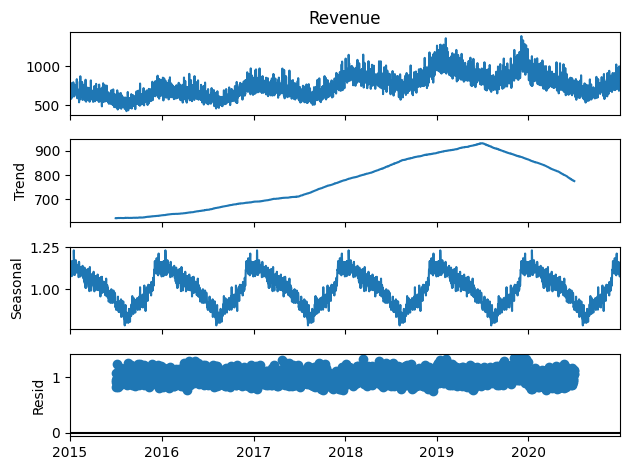

In [15]:
# decomposition
decomposition = seasonal_decompose(x = df.Revenue,
                                   model = 'multiplicative',
                                   period = 365)
decomposition.plot();

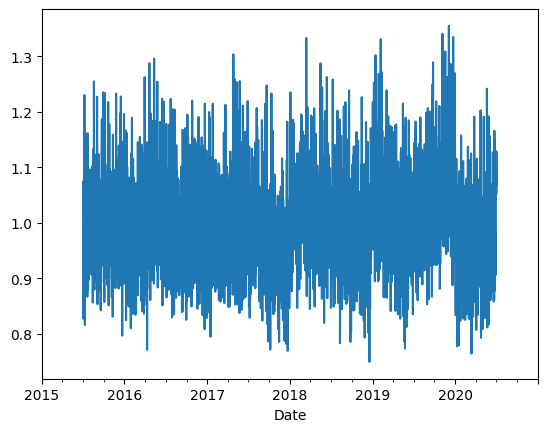

In [16]:
#plotting
decomposition.resid.plot();

<ipython-input-17-996a908aca64>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df.Revenue.resample(rule = 'Q').mean());


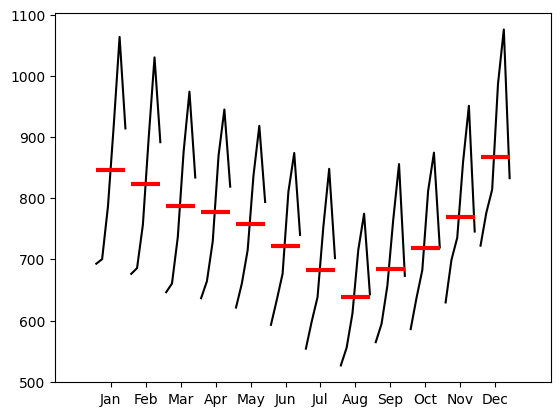

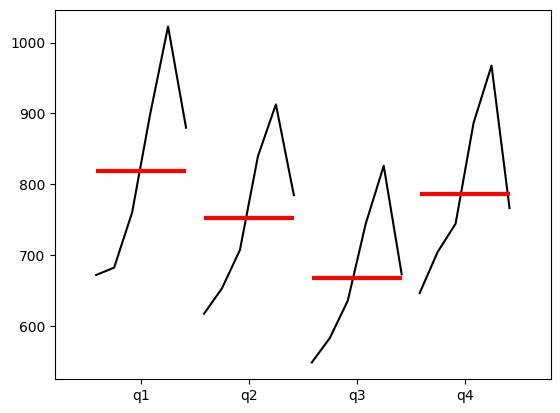

In [17]:
#Seasonal graphs
month_plot(df.Revenue.resample(rule = 'MS').mean());
quarter_plot(df.Revenue.resample(rule = 'Q').mean());

In [19]:
#Aggregating on specific time frame
df.Revenue.resample(rule = 'MS').mean()

,Revenue
Date,
2015-01-01,692.967611
2015-02-01,676.381042
2015-03-01,646.326069
2015-04-01,636.463333
2015-05-01,621.211624
...,...
2020-08-01,642.785119
2020-09-01,673.093698
2020-10-01,719.514838


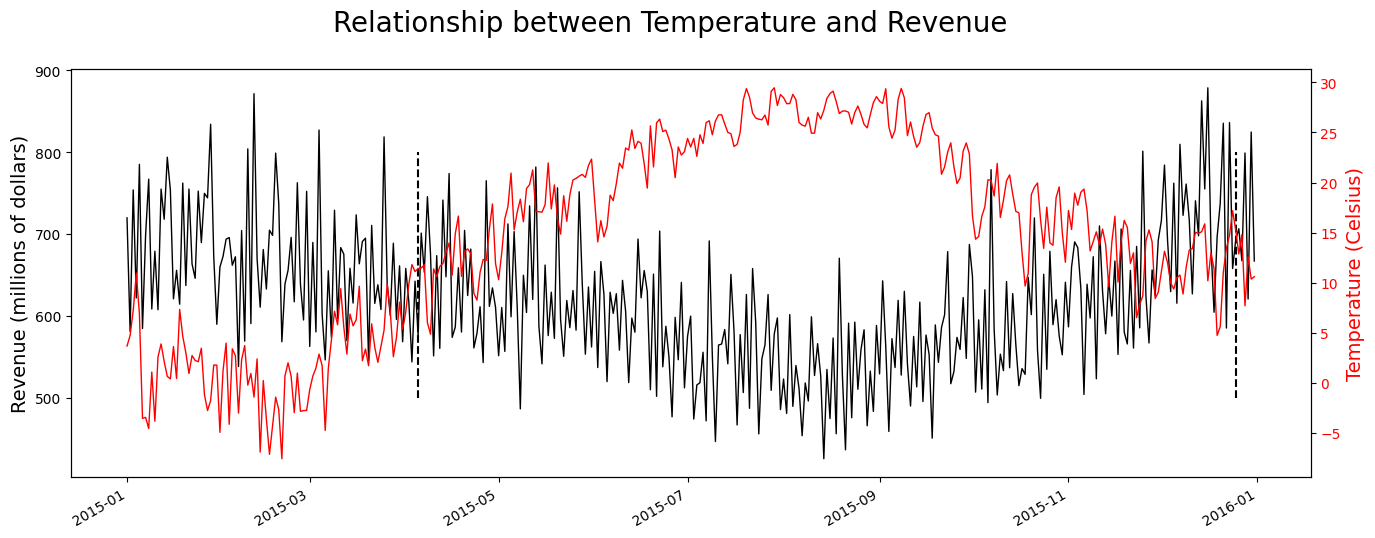

In [21]:
#Create a version B of the dataframe
df_plot = df.loc['2015-01-01':'2015-12-31']

#Define the colors
temp_color = 'red'
y_color = 'black'

#plot
fig, ax1 = plt.subplots(figsize = (16,6))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.Revenue, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("Relationship between Temperature and Revenue", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Revenue (millions of dollars)", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature (Celsius)", color = temp_color, fontsize = 14)

#Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x = events, ymin = 500, ymax = 800, color = 'k', ls = '--')

In [23]:
#correlation
df[['Revenue', 'Temperature', 'Marketing']].corr()

,Revenue,Temperature,Marketing
Revenue,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


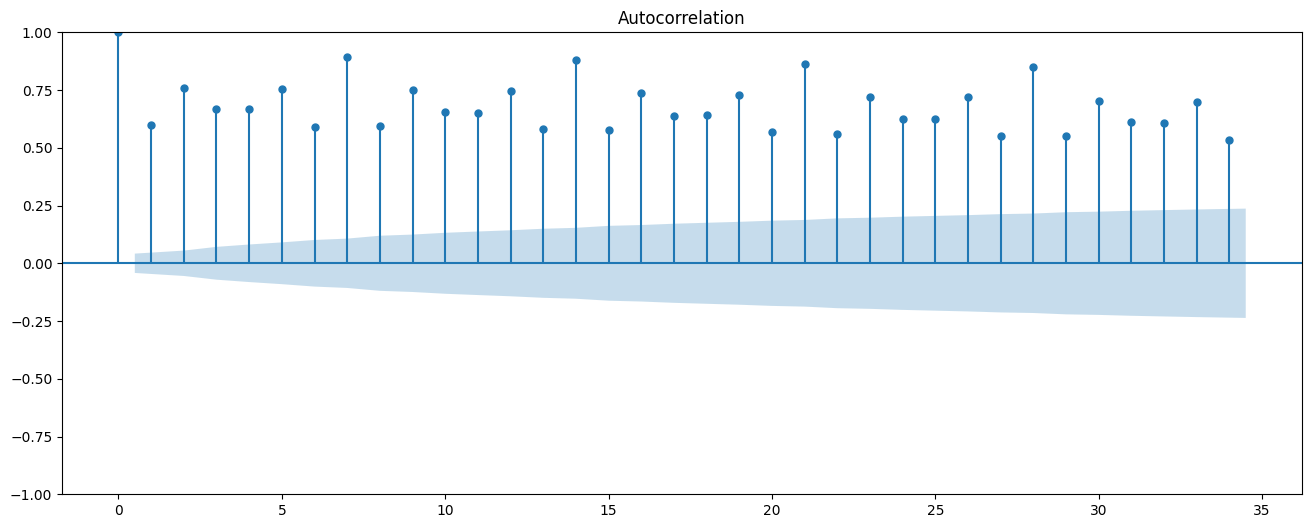

In [24]:
#ACF (Autocorrelation) plot
plt.rcParams["figure.figsize"] = (16,6)
plot_acf(df.Revenue)
plt.show();